In [6]:
from models.TorchClassifier import TorchClassifier
from Embeddings import Embeddings
import time
import utils
from sklearn.model_selection import train_test_split
import torch
from pprint import pprint
from models.FFNN import FFNN

In [7]:
# Create the embeddings object
embeddings = Embeddings('data/doc2vec.npy', 'data/bert.npy', 'data/authors.npy', 'data/authors_encoded.npy', 'pickles/author_encoder.pkl')

In [13]:
def run_ffnn(X, y, figure_title, scale_features=True):
    if scale_features:
        X = torch.from_numpy(utils.scale_feature_matrix(X)).float()
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = TorchClassifier(FFNN, input_dim=768, hidden_dim=128, output_dim=20)
    # Find the best hyperparameters
    start = time.time()
    clf.train(X_train, y_train, epochs=30, lr=0.0001)
    print('Training time: ', time.time() - start)
    
    # Evaluate the model
    pprint(clf.evaluate(X_test, y_test))
    
    # Get the confusion matrix
    clf.get_confusion_matrix(X_test, y_test, figure_title)

    # stats of misclassified
    # incorrect_predictions = X_test[]

In [11]:
# Load the feature matrix and labels
X = embeddings.get_doc2vec(as_torch=True).float()
y = embeddings.get_labels(as_torch=True)
X, y = utils.over_sample(X, y)
X = torch.from_numpy(X)
y = torch.from_numpy(y)

Epoch 1/30, Loss: 2.214916706085205
Epoch 2/30, Loss: 1.9853434562683105
Epoch 3/30, Loss: 1.6981714963912964
Epoch 4/30, Loss: 1.5141249895095825
Epoch 5/30, Loss: 1.4677563905715942
Epoch 6/30, Loss: 1.5131924152374268
Epoch 7/30, Loss: 1.2074683904647827
Epoch 8/30, Loss: 2.0614609718322754
Epoch 9/30, Loss: 1.5534358024597168
Epoch 10/30, Loss: 1.7549047470092773
Epoch 11/30, Loss: 1.0769447088241577
Epoch 12/30, Loss: 0.9759300947189331
Epoch 13/30, Loss: 1.4991930723190308
Epoch 14/30, Loss: 1.612925410270691
Epoch 15/30, Loss: 1.8186078071594238
Epoch 16/30, Loss: 0.8696238398551941
Epoch 17/30, Loss: 0.9940928220748901
Epoch 18/30, Loss: 1.4144134521484375
Epoch 19/30, Loss: 1.1326168775558472
Epoch 20/30, Loss: 0.6419528722763062
Epoch 21/30, Loss: 0.902742326259613
Epoch 22/30, Loss: 0.7680294513702393
Epoch 23/30, Loss: 1.1390355825424194
Epoch 24/30, Loss: 0.9543196558952332
Epoch 25/30, Loss: 0.8690627217292786
Epoch 26/30, Loss: 1.0337847471237183
Epoch 27/30, Loss: 0.362

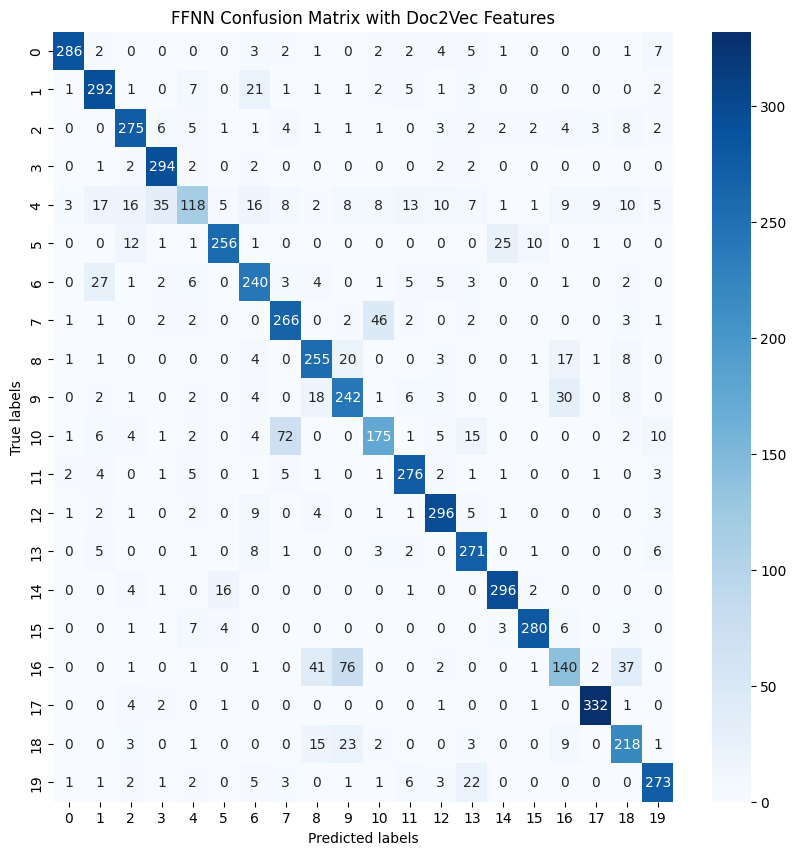

In [14]:
# Run the network with the Doc2Vec Features
run_ffnn(X, y, 'FFNN Confusion Matrix with Doc2Vec Features', scale_features=True)

In [15]:
# Load the BERT embeddings
X = embeddings.get_bert(as_torch=True).float()
y = embeddings.get_labels(as_torch=True)
X, y = utils.over_sample(X, y)
X = torch.from_numpy(X)
y = torch.from_numpy(y)

Epoch 1/30, Loss: 1.934666395187378
Epoch 2/30, Loss: 1.3769068717956543
Epoch 3/30, Loss: 1.3097975254058838
Epoch 4/30, Loss: 0.9150838851928711
Epoch 5/30, Loss: 1.0512243509292603
Epoch 6/30, Loss: 1.1061770915985107
Epoch 7/30, Loss: 0.3340960144996643
Epoch 8/30, Loss: 0.7371372580528259
Epoch 9/30, Loss: 1.4546117782592773
Epoch 10/30, Loss: 0.630465567111969
Epoch 11/30, Loss: 0.5314914584159851
Epoch 12/30, Loss: 1.0172333717346191
Epoch 13/30, Loss: 0.4526120722293854
Epoch 14/30, Loss: 0.40586239099502563
Epoch 15/30, Loss: 0.865406334400177
Epoch 16/30, Loss: 0.5132258534431458
Epoch 17/30, Loss: 0.4948713481426239
Epoch 18/30, Loss: 0.37870627641677856
Epoch 19/30, Loss: 0.31736379861831665
Epoch 20/30, Loss: 0.6940383315086365
Epoch 21/30, Loss: 0.7558931708335876
Epoch 22/30, Loss: 0.6124484539031982
Epoch 23/30, Loss: 0.3081773817539215
Epoch 24/30, Loss: 0.4010077714920044
Epoch 25/30, Loss: 0.4038589596748352
Epoch 26/30, Loss: 1.004658579826355
Epoch 27/30, Loss: 1.3

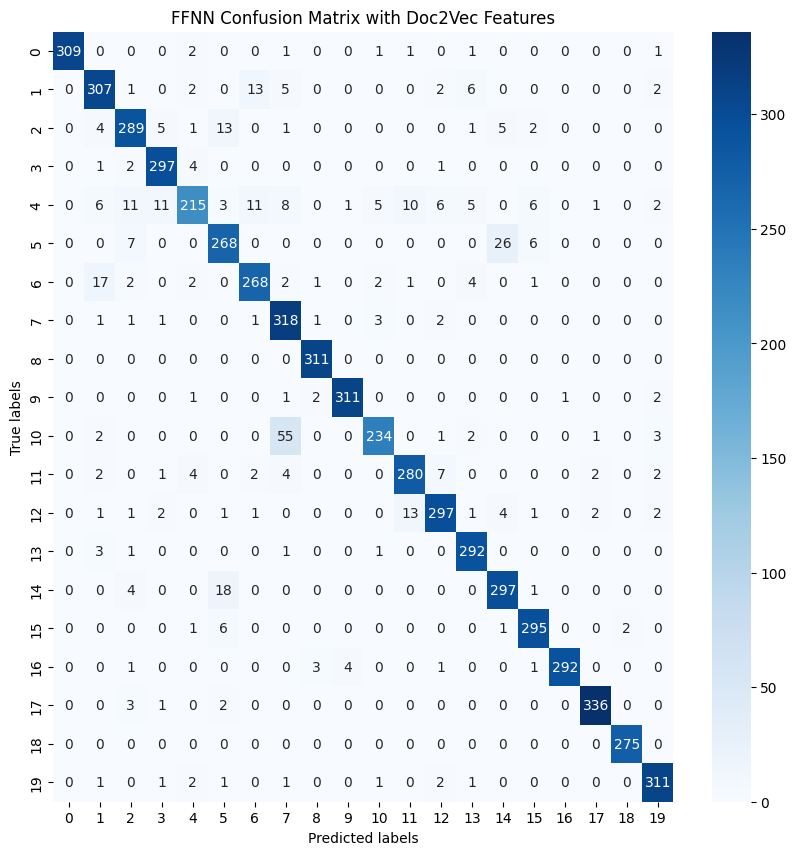

In [16]:
# Run the network with the BERT Features
run_ffnn(X, y, 'FFNN Confusion Matrix with Doc2Vec Features', scale_features=True)